<a href="https://www.kaggle.com/code/mehmetakifciftci/apple-dataset-using-lstm-and-rnn?scriptVersionId=188341226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Apple Dataset using LSTM and RNN

The dataset contains historical stock prices of Apple Inc. We will use this data to train our models. <br> 
The main columns in the dataset include:

Date: The date of the stock price.<br> 
Open: The opening price of the stock on that date.<br> 
High: The highest price of the stock on that date.<br> 
Low: The lowest price of the stock on that date.<br> 
Close: The closing price of the stock on that date.<br> 
Volume: The number of shares traded on that date.<br> 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appledataset/aapl.csv


# Apple Dataset Analysis using LSTM and RNN
In this notebook, we will analyze the Apple stock price dataset using Long Short-Term Memory (LSTM) and Recurrent Neural Networks (RNN). Our goal is to predict future stock prices based on historical data.


### Import Necessary Libraries



In [2]:
#important libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from warnings import filterwarnings
filterwarnings("ignore")

2024-07-15 06:57:38.412474: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 06:57:38.412623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 06:57:38.547827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Load the Dataset


In [3]:
# Some functions to load and preprocess data
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    data = data['Close'].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    train_size = int(len(data) * 0.80)
    train, test = data[:train_size, :], data[train_size:, :]
    return train, test, scaler

In [4]:
# A function to create dataset with given look-back period
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Building the Models 

In [5]:

# A func to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=96, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [6]:
# A func to build the RNN model
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=96, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [7]:
# A func to build the GRU model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=96, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [8]:
# A func to plot training loss
def plot_training_loss(history, title):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'{title} - Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

In [9]:
# A func to plot predictions vs real values
def plot_predictions(Y_test, test_predict, title):
    plt.plot(Y_test, color='blue', label='Real Apple Stock Price')
    plt.plot(test_predict, color='red', label='Predicted Apple Stock Price')
    plt.title(f'{title} - Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

In [10]:
# A func to evaluate the model
def evaluate_model(Y_test, test_predict):
    mse = mean_squared_error(Y_test, test_predict)
    mae = mean_absolute_error(Y_test, test_predict)
    r2 = r2_score(Y_test, test_predict)
    return mse, mae, r2

In [11]:
# A func to plot error 
def plot_error_distribution(Y_test, pred, title):
    plt.figure(figsize=(12, 6))
    errors = Y_test - pred
    plt.hist(errors, bins=50, alpha=0.5, label='Errors')
    plt.title(f'{title} - Error Distribution')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## Conclusion
In this notebook, we have demonstrated how to use LSTM and RNN models to predict stock prices. The models were trained on historical Apple stock prices and evaluated on their ability to predict future prices. Further improvements can be made by tuning the model parameters and exploring different architectures.


Epoch 1/100
152/152 - 5s - 35ms/step - loss: 0.0549 - val_loss: 0.0062
Epoch 2/100
152/152 - 1s - 4ms/step - loss: 0.0184 - val_loss: 0.0035
Epoch 3/100
152/152 - 1s - 4ms/step - loss: 0.0072 - val_loss: 3.0141e-04
Epoch 4/100
152/152 - 1s - 4ms/step - loss: 9.8183e-04 - val_loss: 8.4951e-05
Epoch 5/100
152/152 - 1s - 4ms/step - loss: 0.0010 - val_loss: 9.0827e-05
Epoch 6/100
152/152 - 1s - 4ms/step - loss: 0.0010 - val_loss: 8.2390e-05
Epoch 7/100
152/152 - 1s - 4ms/step - loss: 8.1170e-04 - val_loss: 8.5941e-05
Epoch 8/100
152/152 - 1s - 4ms/step - loss: 7.0427e-04 - val_loss: 8.4954e-05
Epoch 9/100
152/152 - 1s - 4ms/step - loss: 6.5831e-04 - val_loss: 8.0489e-05
Epoch 10/100
152/152 - 1s - 4ms/step - loss: 6.8946e-04 - val_loss: 8.7391e-05
Epoch 11/100
152/152 - 1s - 4ms/step - loss: 6.2594e-04 - val_loss: 9.0206e-05
Epoch 12/100
152/152 - 1s - 4ms/step - loss: 6.5400e-04 - val_loss: 8.3451e-05
Epoch 13/100
152/152 - 1s - 4ms/step - loss: 7.1197e-04 - val_loss: 7.3707e-05
Epoch 14/

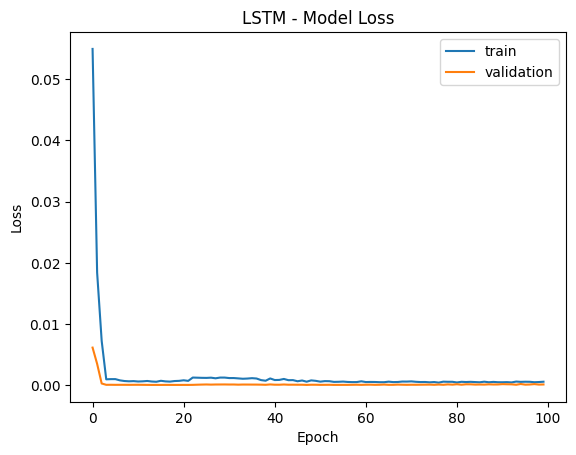

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


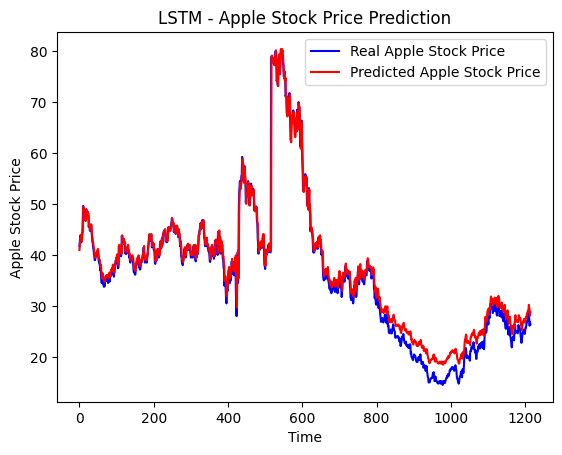

Epoch 1/100
152/152 - 4s - 29ms/step - loss: 0.0180 - val_loss: 6.9597e-05
Epoch 2/100
152/152 - 0s - 3ms/step - loss: 0.0020 - val_loss: 7.7925e-05
Epoch 3/100
152/152 - 0s - 3ms/step - loss: 0.0018 - val_loss: 1.1319e-04
Epoch 4/100
152/152 - 0s - 3ms/step - loss: 0.0018 - val_loss: 8.5310e-05
Epoch 5/100
152/152 - 0s - 3ms/step - loss: 0.0016 - val_loss: 9.9590e-05
Epoch 6/100
152/152 - 0s - 3ms/step - loss: 0.0013 - val_loss: 8.0126e-05
Epoch 7/100
152/152 - 0s - 3ms/step - loss: 0.0011 - val_loss: 6.9354e-05
Epoch 8/100
152/152 - 0s - 3ms/step - loss: 0.0011 - val_loss: 1.1573e-04
Epoch 9/100
152/152 - 0s - 3ms/step - loss: 0.0012 - val_loss: 1.0936e-04
Epoch 10/100
152/152 - 0s - 3ms/step - loss: 0.0011 - val_loss: 9.1817e-05
Epoch 11/100
152/152 - 0s - 3ms/step - loss: 0.0011 - val_loss: 1.9751e-04
Epoch 12/100
152/152 - 0s - 3ms/step - loss: 0.0013 - val_loss: 9.8865e-05
Epoch 13/100
152/152 - 0s - 3ms/step - loss: 9.8859e-04 - val_loss: 1.3450e-04
Epoch 14/100
152/152 - 0s - 3

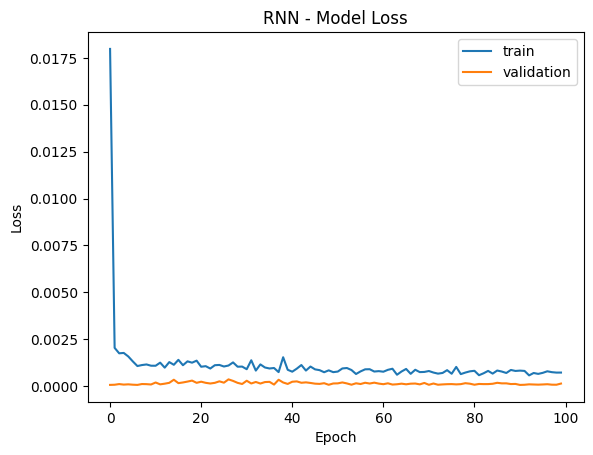

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


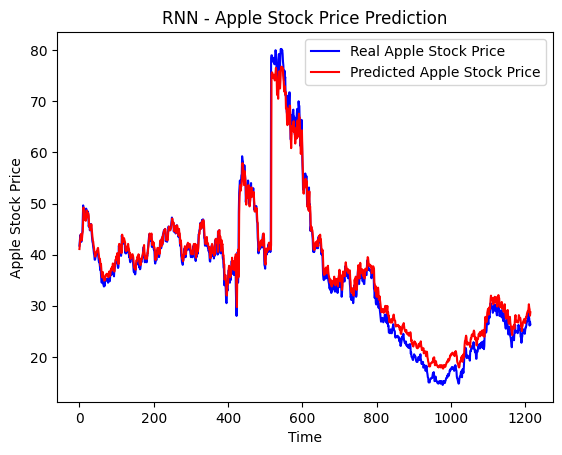

Epoch 1/100
152/152 - 6s - 39ms/step - loss: 0.0415 - val_loss: 0.0049
Epoch 2/100
152/152 - 1s - 4ms/step - loss: 0.0127 - val_loss: 9.3443e-04
Epoch 3/100
152/152 - 1s - 4ms/step - loss: 0.0033 - val_loss: 1.3208e-04
Epoch 4/100
152/152 - 1s - 4ms/step - loss: 9.4169e-04 - val_loss: 9.2984e-05
Epoch 5/100
152/152 - 1s - 4ms/step - loss: 8.5550e-04 - val_loss: 8.0023e-05
Epoch 6/100
152/152 - 1s - 4ms/step - loss: 8.0331e-04 - val_loss: 7.5823e-05
Epoch 7/100
152/152 - 1s - 4ms/step - loss: 7.1137e-04 - val_loss: 8.5251e-05
Epoch 8/100
152/152 - 1s - 4ms/step - loss: 8.5085e-04 - val_loss: 6.9085e-05
Epoch 9/100
152/152 - 1s - 4ms/step - loss: 7.2665e-04 - val_loss: 8.1368e-05
Epoch 10/100
152/152 - 1s - 4ms/step - loss: 8.1763e-04 - val_loss: 1.1742e-04
Epoch 11/100
152/152 - 1s - 4ms/step - loss: 8.4019e-04 - val_loss: 1.4921e-04
Epoch 12/100
152/152 - 1s - 4ms/step - loss: 0.0010 - val_loss: 1.1426e-04
Epoch 13/100
152/152 - 1s - 4ms/step - loss: 9.9508e-04 - val_loss: 1.3231e-04
E

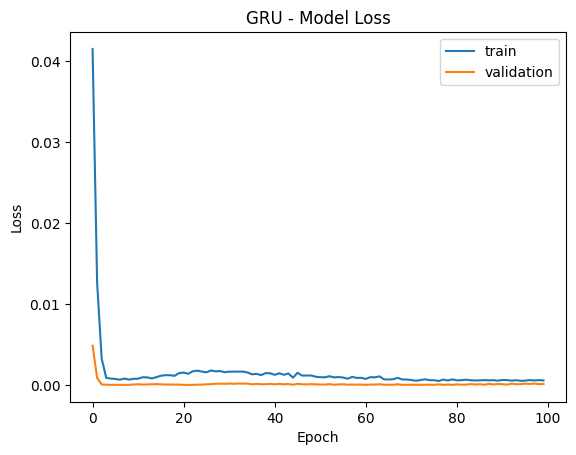

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


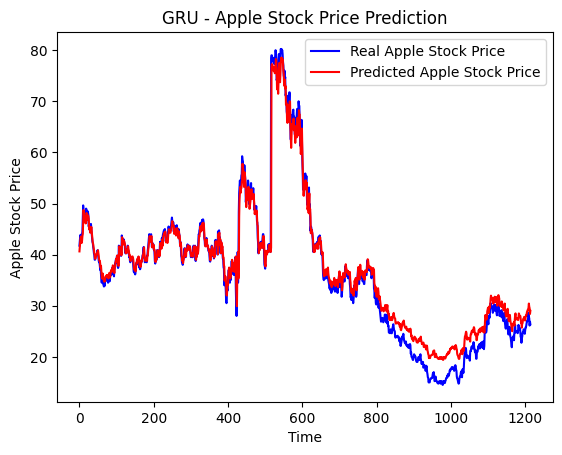

LSTM - MSE: 4.959940218129605, MAE: 1.5786480722937561, R2: 0.9744633638608861
RNN - MSE: 4.907258258792497, MAE: 1.6091828315640668, R2: 0.9747346010064004
GRU - MSE: 6.24504530123083, MAE: 1.779406084539468, R2: 0.9678469008664878


In [12]:
# Main file
def main(filepath):
    train, test, scaler = load_and_preprocess_data(filepath)
    look_back = 1
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # Reshape input
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Train LSTM 
    lstm_model = build_lstm_model((X_train.shape[1], 1))
    lstm_history = lstm_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
    plot_training_loss(lstm_history, 'LSTM')
    lstm_predict = lstm_model.predict(X_test)
    lstm_predict = scaler.inverse_transform(lstm_predict)
    Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))
    plot_predictions(Y_test_scaled, lstm_predict, 'LSTM')
    lstm_mse, lstm_mae, lstm_r2 = evaluate_model(Y_test_scaled, lstm_predict)

    # Train RNN model
    rnn_model = build_rnn_model((X_train.shape[1], 1))
    rnn_history = rnn_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
    plot_training_loss(rnn_history, 'RNN')
    rnn_predict = rnn_model.predict(X_test)
    rnn_predict = scaler.inverse_transform(rnn_predict)
    plot_predictions(Y_test_scaled, rnn_predict, 'RNN')
    rnn_mse, rnn_mae, rnn_r2 = evaluate_model(Y_test_scaled, rnn_predict)

    # Train GRU model
    gru_model = build_gru_model((X_train.shape[1], 1))
    gru_history = gru_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
    plot_training_loss(gru_history, 'GRU')
    gru_predict = gru_model.predict(X_test)
    gru_predict = scaler.inverse_transform(gru_predict)
    plot_predictions(Y_test_scaled, gru_predict, 'GRU')
    gru_mse, gru_mae, gru_r2 = evaluate_model(Y_test_scaled, gru_predict)

    # Print results
    print(f'LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}, R2: {lstm_r2}')
    print(f'RNN - MSE: {rnn_mse}, MAE: {rnn_mae}, R2: {rnn_r2}')
    print(f'GRU - MSE: {gru_mse}, MAE: {gru_mae}, R2: {gru_r2}')

if __name__ == "__main__":
    main('/kaggle/input/appledataset/aapl.csv')


## Evaluating the Model
We evaluate the model by making predictions on the test set and comparing them to the actual stock prices.





----